In [1]:
# Load libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the preprocessed csv
df = pd.read_csv('preprocessed_co2.csv')

## Informació sobre les respostes de la gent - que busquen i perquè

In [3]:
# Get the relevant variables
df_answers = df[["r_fastest","r_cheapest","r_confortable","r_onlyoption",
                      "r_environmental","r_healthiest","r_needprivate"]]

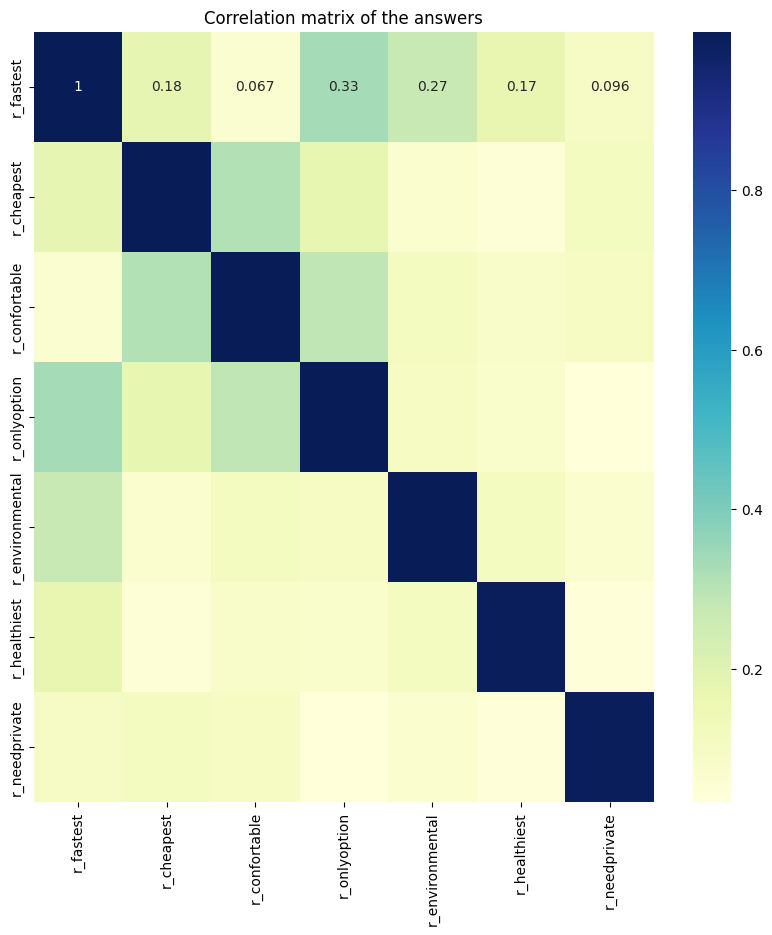

                 r_fastest  r_cheapest  r_confortable  r_onlyoption  \
r_fastest         0.998447    0.177373       0.066938      0.333194   
r_cheapest        0.177373    0.998349       0.311325      0.175747   
r_confortable     0.066938    0.311325       0.998312      0.287510   
r_onlyoption      0.333194    0.175747       0.287510      0.997541   
r_environmental   0.271293    0.069675       0.108471      0.101379   
r_healthiest      0.172237    0.048171       0.083552      0.072831   
r_needprivate     0.095521    0.110536       0.104484      0.033419   

                 r_environmental  r_healthiest  r_needprivate  
r_fastest               0.271293      0.172237       0.095521  
r_cheapest              0.069675      0.048171       0.110536  
r_confortable           0.108471      0.083552       0.104484  
r_onlyoption            0.101379      0.072831       0.033419  
r_environmental         0.995599      0.106984       0.069454  
r_healthiest            0.106984      0.991418 

In [23]:
from scipy.stats import chi2_contingency

# Function to calculate the relationship between two categorical variables
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Calculate the correlation matrix
rows = []
for var1 in df_answers:
    col = []
    for var2 in df_answers:
        confusion_matrix = pd.crosstab(df_answers[var1], df_answers[var2])
        col.append(cramers_v(confusion_matrix))
    rows.append(col)
correlation_matrix = np.array(rows)
correlation_matrix = pd.DataFrame(correlation_matrix, columns = df_answers.columns, index = df_answers.columns)

# Make a colorized heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
# Title
plt.title('Correlation matrix of the answers')
plt.show()


# Display the correlation matrix
print(correlation_matrix)


C:\Users\mique\AppData\Local\Temp\ipykernel_22980\2774735344.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  answered_yes.append(df_answers[var].value_counts()[1])
C:\Users\mique\AppData\Local\Temp\ipykernel_22980\2774735344.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  answered_yes.append(df_answers[var].value_counts()[1])
C:\Users\mique\AppData\Local\Temp\ipykernel_22980\2774735344.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

1909


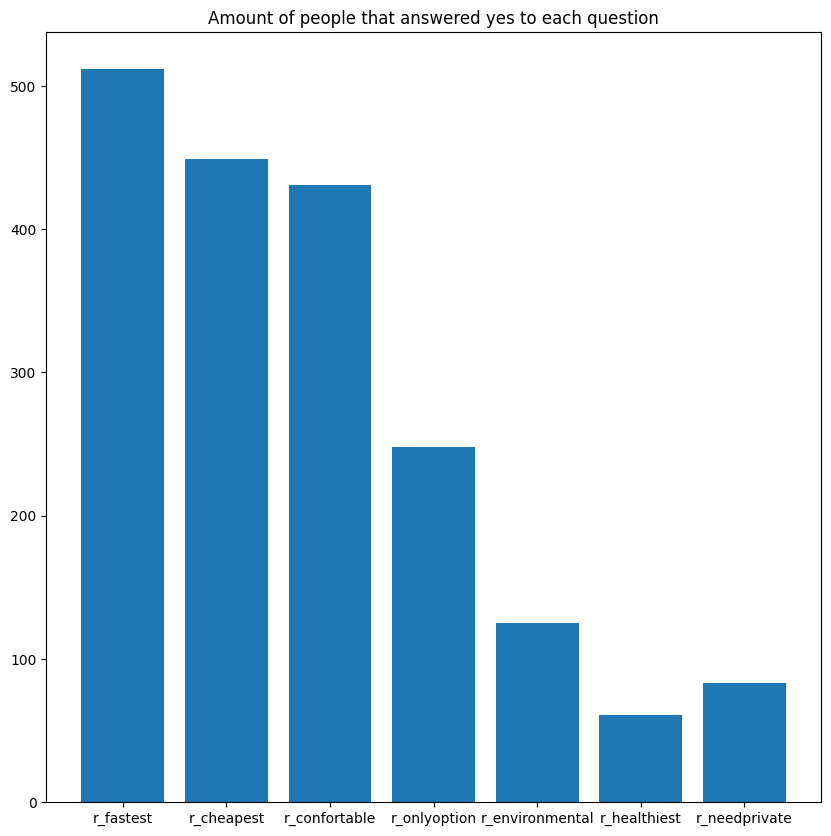

In [24]:
# For each answer, make a plot with the ammount of people that chose that answer

answered_yes = []

for var in df_answers:
    answered_yes.append(df_answers[var].value_counts()[1])

# Print total ammount of yes answers
print(sum(answered_yes))

# Make a bar plot
plt.figure(figsize=(10,10))
plt.bar(df_answers.columns, answered_yes)
plt.title('Amount of people that answered yes to each question')
plt.show()
plt.ylabel= "Answered yes"

## See what type of transport the people that value each column use

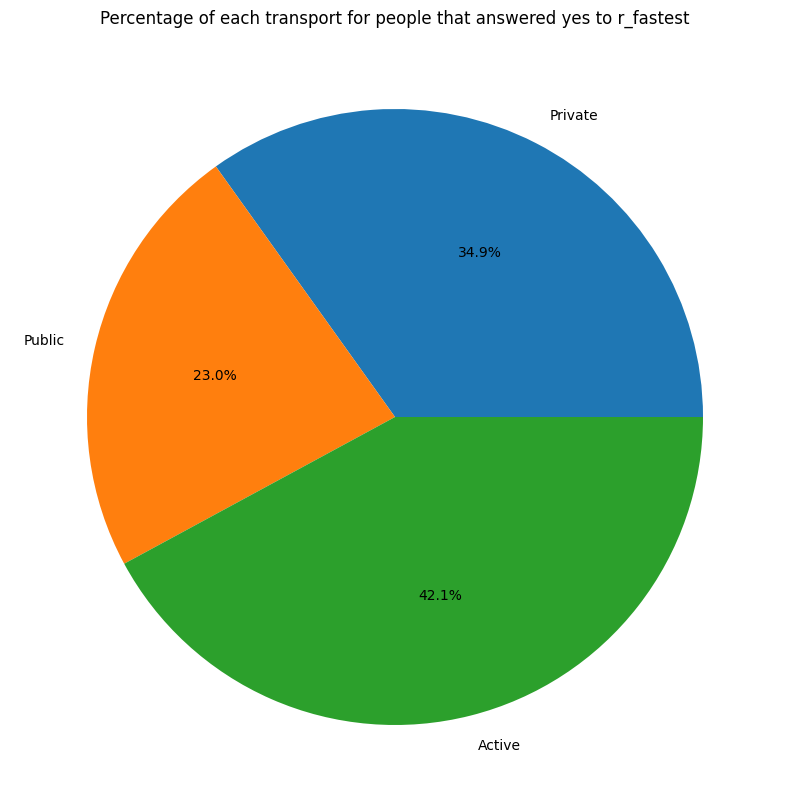

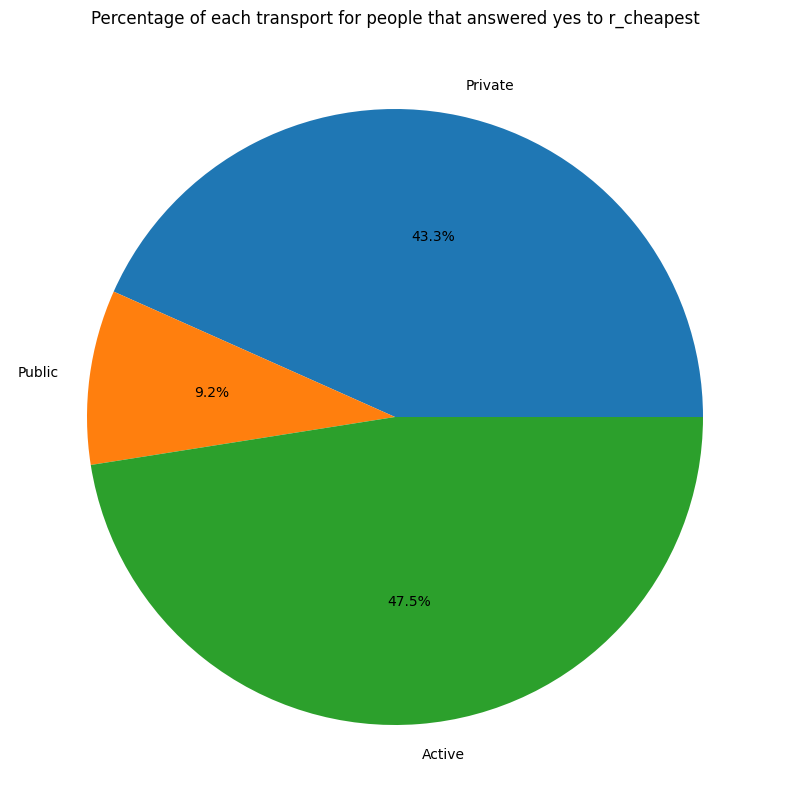

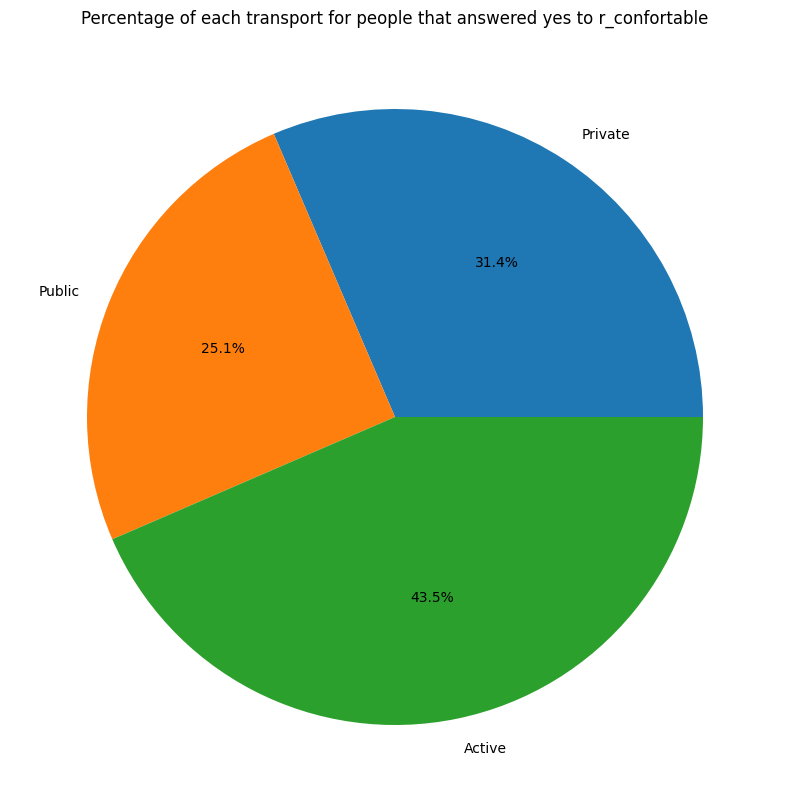

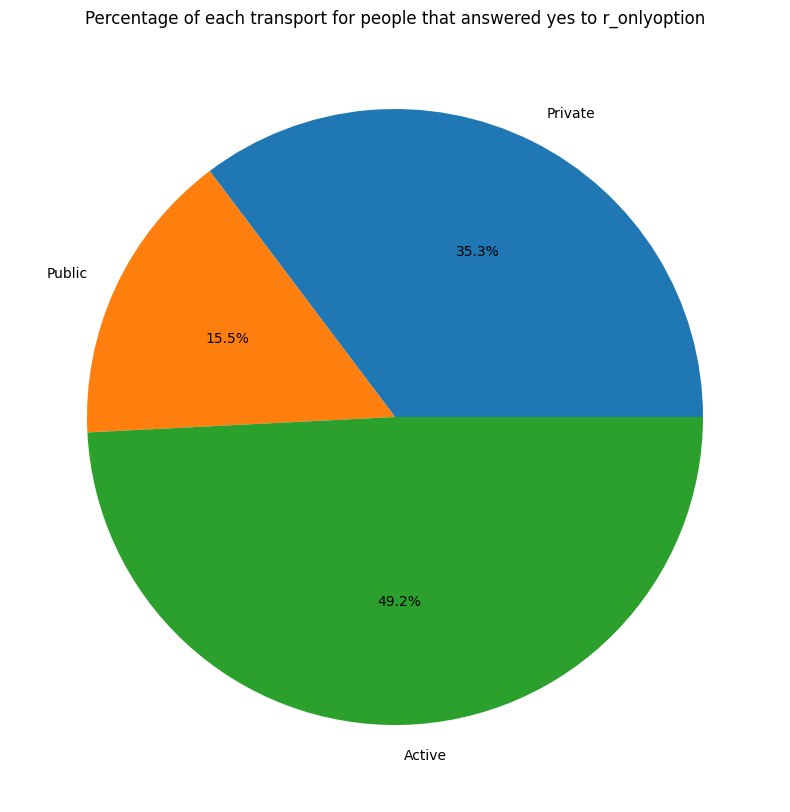

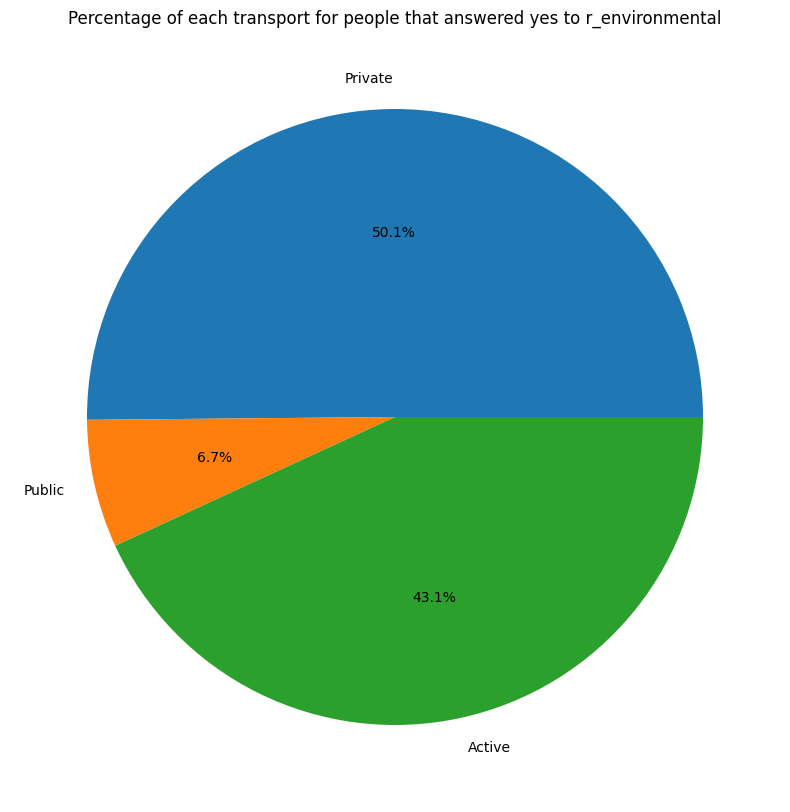

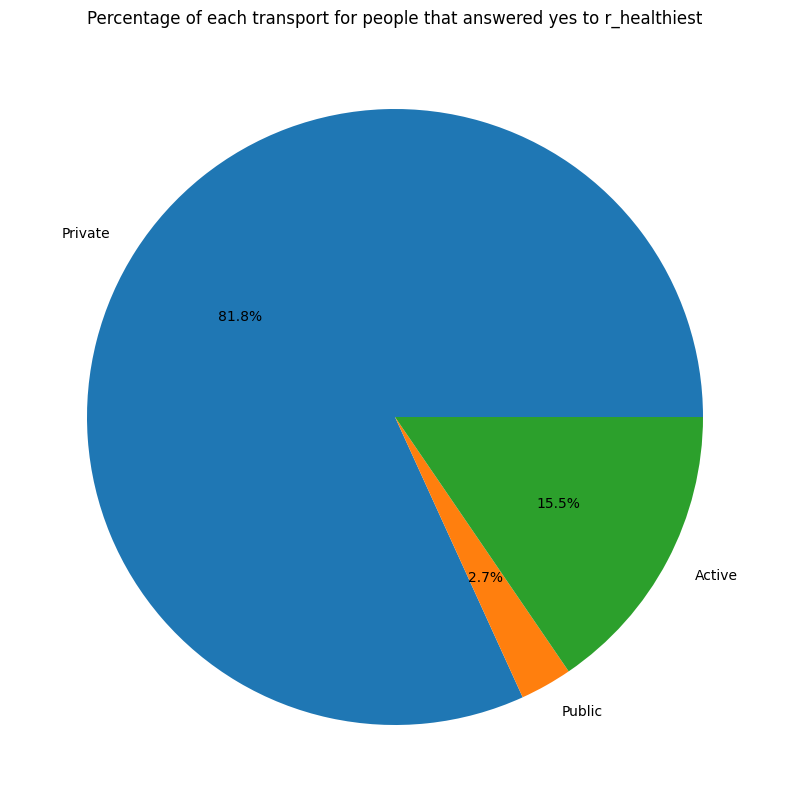

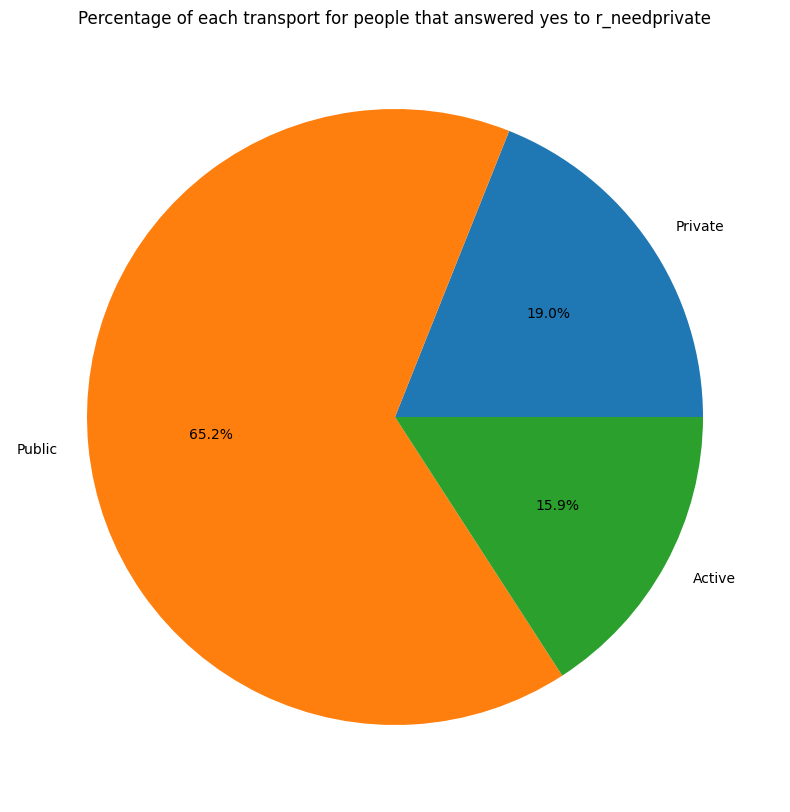

In [25]:
# Relevant variables:
relevant_vars = ["r_fastest","r_cheapest","r_confortable","r_onlyoption",
                      "r_environmental","r_healthiest","r_needprivate"]

# Get only the rows with people that selected each of the variables
df_fastest, df_cheapest, df_confortable, df_onlyoption, df_environmental, df_healthiest, df_needprivate = [df for _ in relevant_vars]
datasets = [df_fastest, df_cheapest, df_confortable, df_onlyoption, df_environmental, df_healthiest, df_needprivate]

# In each dataset, remove the rows that have a 0 in the relevant variable
for i in range(len(datasets)):
    datasets[i] = datasets[i][datasets[i][relevant_vars[i]] == "Yes"]

transport_ratios = [[] for _ in relevant_vars]

# For each dataset, calculate the total ratio of each transport
for i in range(len(datasets)):
    transport_ratios[i].append(datasets[i].iloc[:, -3].sum()/len(datasets[i]))
    transport_ratios[i].append(datasets[i].iloc[:, -2].sum()/len(datasets[i]))
    transport_ratios[i].append(datasets[i].iloc[:, -1].sum()/len(datasets[i]))

ratios = ["Private", "Public", "Active"]

# For each dataset, make a pie chart with the ratios
for i in range(len(datasets)):
    plt.figure(figsize=(10,10))
    plt.pie(transport_ratios[i], labels = ratios, autopct='%1.1f%%')
    plt.title("Percentage of each transport for people that answered yes to " + relevant_vars[i])
    plt.show()


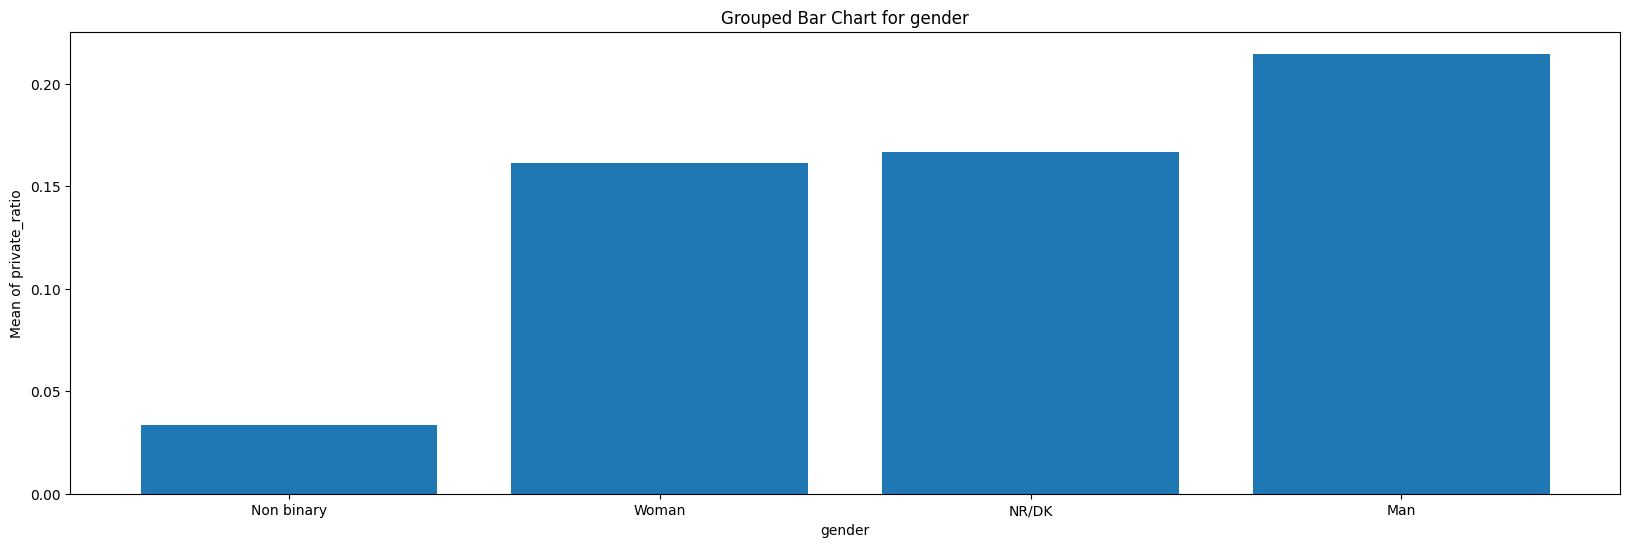

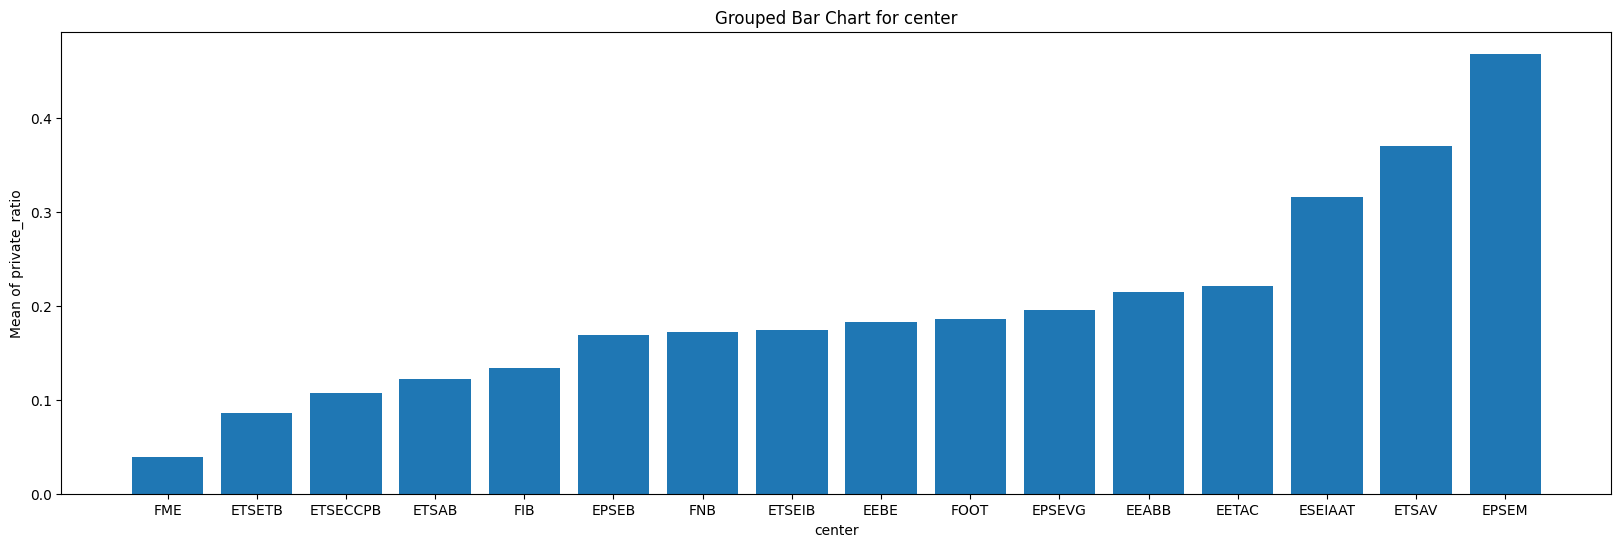

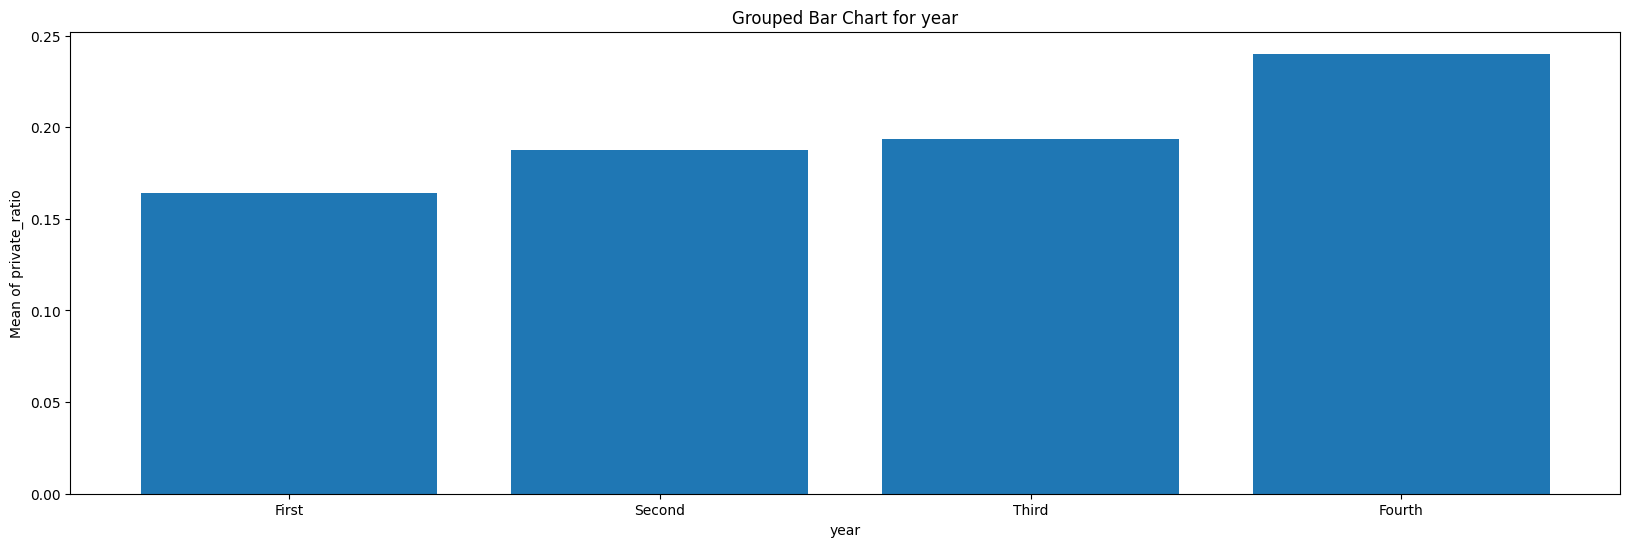

In [7]:
# Now, let's see the relationship between the "type" of person/location and the transport they chose

cat_no_bin = ["gender","center","year"]

# Now make it ordered by the mean of private_ratio
for col in cat_no_bin:
    plt.figure(figsize=(20, 6))
    df_grouped = df.groupby(col)['private_ratio'].mean().reset_index()  # Aggregating with mean for demonstration
    df_grouped = df_grouped.sort_values(by=['private_ratio'])
    plt.bar(df_grouped[col], df_grouped['private_ratio'])
    plt.title(f'Grouped Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Mean of private_ratio')
    plt.show()

## Let's look at the distance, shall we?
We can calculate the average distance and look at the ratio of private transport someone uses, look at the average distance together with the importance given to each category

C:\Users\mique\AppData\Local\Temp\ipykernel_22980\3679006201.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_private = df.groupby(pd.cut(df['private_ratio'], bins=bins_private, right=False))
C:\Users\mique\AppData\Local\Temp\ipykernel_22980\3679006201.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_active = df.groupby(pd.cut(df['active_ratio'], bins=bins_active, right=False))
C:\Users\mique\AppData\Local\Temp\ipykernel_22980\3679006201.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to re

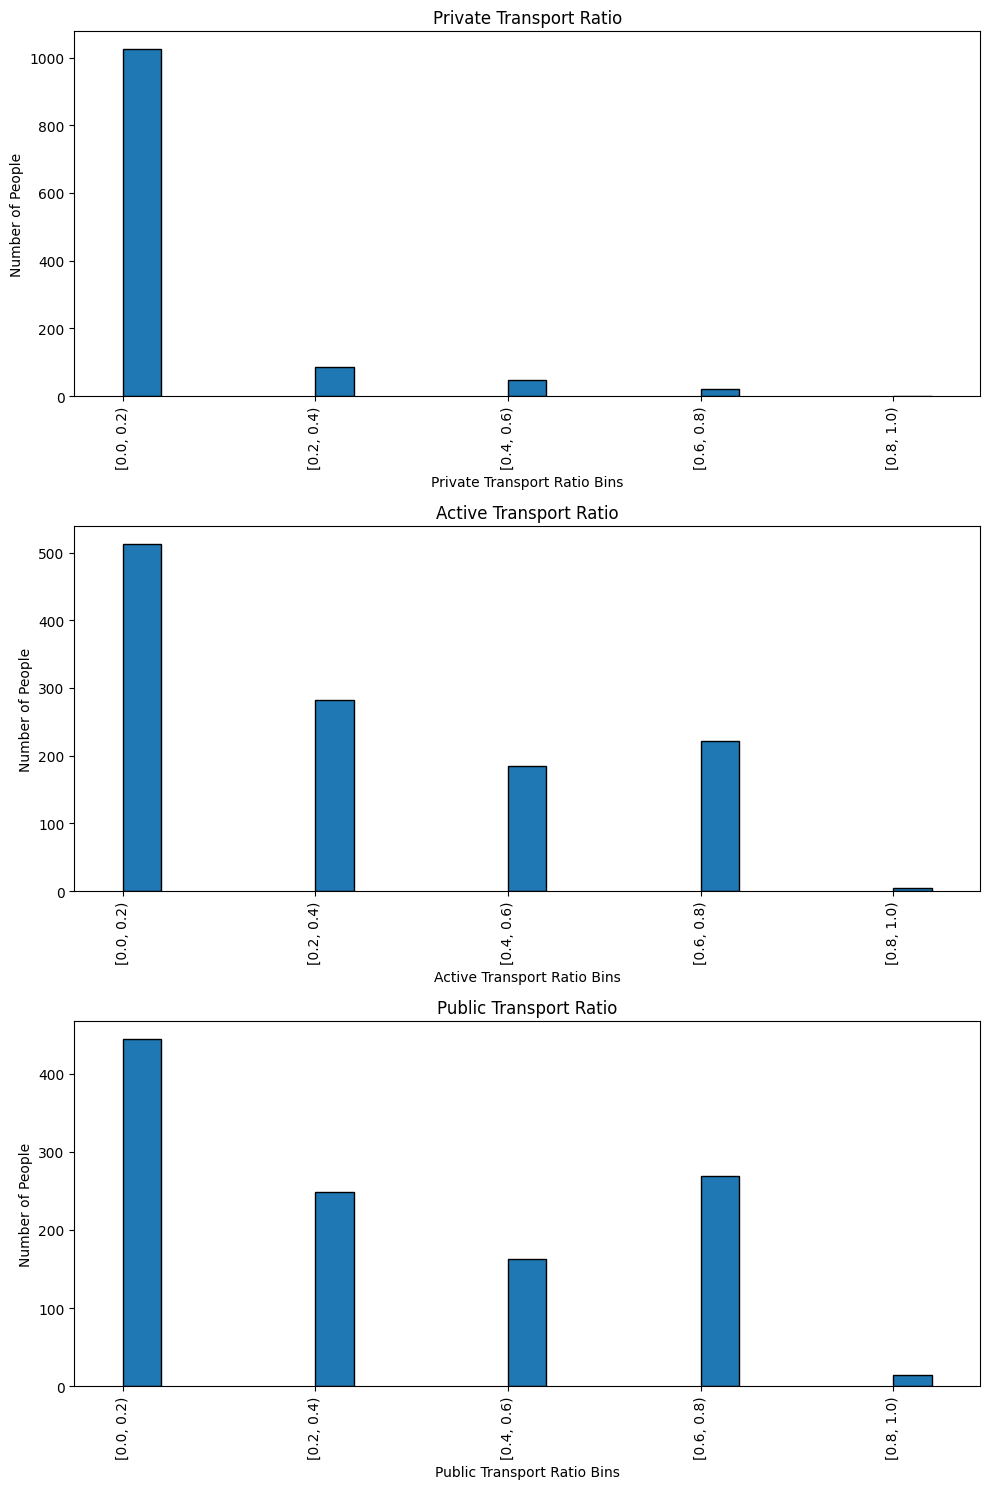

In [22]:
# Separate the people in groups depending on the ratio for private/active/public transport
# Specify the number of bins
num_bins = 5

# Calculate bin width
bin_width = 1.0 / num_bins

# Create bins using a for loop
bins_private = [i * bin_width for i in range(num_bins + 1)]
bins_active = [i * bin_width for i in range(num_bins + 1)]
bins_public = [i * bin_width for i in range(num_bins + 1)]

grouped_private = df.groupby(pd.cut(df['private_ratio'], bins=bins_private, right=False))
grouped_active = df.groupby(pd.cut(df['active_ratio'], bins=bins_active, right=False))
grouped_public = df.groupby(pd.cut(df['public_ratio'], bins=bins_public, right=False))

# Plot barplots for each group
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Private Transport
grouped_private.size().plot(kind='bar', width=bin_width, edgecolor='black', align='edge', ax=axes[0])
axes[0].set_title('Private Transport Ratio')
axes[0].set_xlabel('Private Transport Ratio Bins')
axes[0].set_ylabel('Number of People')

# Active Transport
grouped_active.size().plot(kind='bar', width=bin_width, edgecolor='black', align='edge', ax=axes[1])
axes[1].set_title('Active Transport Ratio')
axes[1].set_xlabel('Active Transport Ratio Bins')
axes[1].set_ylabel('Number of People')

# Public Transport
grouped_public.size().plot(kind='bar', width=bin_width, edgecolor='black', align='edge', ax=axes[2])
axes[2].set_title('Public Transport Ratio')
axes[2].set_xlabel('Public Transport Ratio Bins')
axes[2].set_ylabel('Number of People')

plt.tight_layout()
plt.show()

